## Housing Case Study

Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

### Importing and Understanding Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing Housing.csv
housing = pd.read_csv('Housing.csv')

In [3]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


### Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- We need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [5]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [6]:
# Now let's see the head
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


The variable 'furnishingstatus' had three levels. We need to convert it to integer.

In [7]:
# Creating a dummy variable for 'furnishingstatus'
status = pd.get_dummies(housing['furnishingstatus'])

In [8]:
# The result has created three variables that are not needed.
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [9]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status df.
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)

In [10]:
#Adding the results to the master dataframe
housing = pd.concat([housing,status],axis=1)

In [11]:
# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [12]:
# Dropping furnishingstatus as we have created the dummies for it
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [13]:
# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Creating a new variable

In [14]:
# Let us create the new metric and assign it to "areaperbedroom"
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

In [15]:
# Metric:bathrooms per bedroom
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']

In [16]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


### Rescaling the Features 
It is extremely important to rescale the variables so that they have a comparable scale. 
There are twocoon ways of rescaling 
1. Normalisation (min-max scaling) and 
2. standardisation (mean-o, sigma-1) 
Let's try normalisation

In [17]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
housing = housing.apply(normalize) 
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,0.738811,0.155977,0.206972,0.237920,0.398165,0.141284,-0.177982,-0.350459,-0.045872,0.684404,0.435474,0.765138,-0.416514,-0.326606,0.005652,0.064367
1,0.647902,0.261818,0.206972,0.904587,0.731498,0.141284,-0.177982,-0.350459,-0.045872,0.684404,0.768807,-0.234862,-0.416514,-0.326606,0.067559,0.664367
2,0.647902,0.330547,0.006972,0.237920,0.064832,0.141284,-0.177982,0.649541,-0.045872,-0.315596,0.435474,0.765138,0.583486,-0.326606,0.241220,0.264367
3,0.644872,0.161475,0.206972,0.237920,0.064832,0.141284,-0.177982,0.649541,-0.045872,0.684404,0.768807,0.765138,-0.416514,-0.326606,0.008868,0.064367
4,0.575175,0.155977,0.206972,-0.095413,0.064832,0.141284,0.822018,0.649541,-0.045872,0.684404,0.435474,-0.234862,-0.416514,-0.326606,0.005652,-0.235633
5,0.526690,0.161475,0.006972,0.571254,-0.268502,0.141284,-0.177982,0.649541,-0.045872,0.684404,0.435474,0.765138,0.583486,-0.326606,0.109366,0.664367
6,0.466084,0.235702,0.206972,0.571254,0.731498,0.141284,-0.177982,-0.350459,-0.045872,0.684404,0.435474,0.765138,0.583486,-0.326606,0.052283,0.364367
7,0.466084,0.759413,0.406972,0.571254,0.064832,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,0.673394,0.228356,0.184367
8,0.441842,0.202712,0.206972,-0.095413,0.064832,0.141284,0.822018,0.649541,-0.045872,0.684404,0.435474,0.765138,-0.416514,-0.326606,0.032987,-0.235633
9,0.435781,0.041200,0.006972,0.237920,0.731498,0.141284,0.822018,-0.350459,-0.045872,0.684404,0.102141,0.765138,-0.416514,0.673394,0.015567,0.264367


## Splitting Data into Training and Testing Sets

In [18]:
housing.columns

Index([u'price', u'area', u'bedrooms', u'bathrooms', u'stories', u'mainroad',
       u'guestroom', u'basement', u'hotwaterheating', u'airconditioning',
       u'parking', u'prefarea', u'semi-furnished', u'unfurnished',
       u'areaperbedroom', u'bbratio'],
      dtype='object')

In [19]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = housing['price']

In [20]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

/home/abhi/venvs/notebook/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Building a linear model

In [21]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

In [22]:
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           4.56e-82
Time:                        03:15:54   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0022      0.005     

### Checking VIF

In [23]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [24]:
# Calculating Vif value
vif_cal(input_data=housing, dependent_col="price")

,Var,Vif
2,bathrooms,20.21
14,bbratio,19.04
13,areaperbedroom,17.59
0,area,16.00
1,bedrooms,9.11
12,unfurnished,1.68
11,semi-furnished,1.59
3,stories,1.51
6,basement,1.33
5,guestroom,1.23


## Correlation matrix

In [25]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

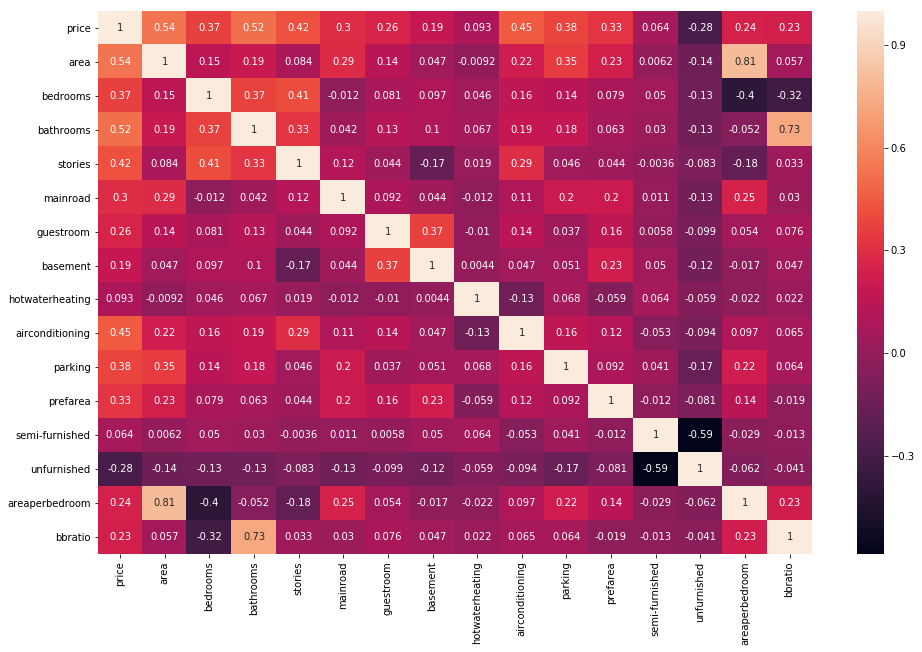

In [26]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.corr(),annot = True)

### Dropping the Variable and Updating the Model

In [27]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('bbratio', 1)

In [28]:
# Create a second fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

In [29]:
#Let's see the summary of our second linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           6.46e-83
Time:                        03:15:57   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0022      0.005     

### Dropping the Variable and Updating the Model

In [30]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bbratio"], axis=1), dependent_col="price")

,Var,Vif
13,areaperbedroom,14.14
0,area,12.84
1,bedrooms,4.99
12,unfurnished,1.68
11,semi-furnished,1.59
3,stories,1.50
6,basement,1.32
2,bathrooms,1.29
5,guestroom,1.22
9,parking,1.22


In [31]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('bedrooms', 1)

In [32]:
# Create a third fitted model
lm_3 = sm.OLS(y_train,X_train).fit()

In [33]:
#Let's see the summary of our third linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           1.66e-83
Time:                        03:15:57   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0021      0.005     

In [34]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio"], axis=1), dependent_col="price")

,Var,Vif
0,area,4.21
12,areaperbedroom,3.88
11,unfurnished,1.67
10,semi-furnished,1.58
2,stories,1.49
5,basement,1.32
1,bathrooms,1.29
8,parking,1.22
4,guestroom,1.21
7,airconditioning,1.21


### Dropping the Variable and Updating the Model

In [35]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('areaperbedroom', 1)

In [36]:
# Create a fourth fitted model
lm_4 = sm.OLS(y_train,X_train).fit()

In [37]:
#Let's see the summary of our fourth linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           2.35e-83
Time:                        03:15:58   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0013      0.005     

In [38]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom"], axis=1), dependent_col="price")

,Var,Vif
11,unfurnished,1.67
10,semi-furnished,1.58
0,area,1.32
2,stories,1.30
5,basement,1.30
1,bathrooms,1.22
4,guestroom,1.21
7,airconditioning,1.21
8,parking,1.21
3,mainroad,1.16


### Dropping the Variable and Updating the Model

In [39]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('semi-furnished', 1)

In [40]:
# Create a fifth fitted model
lm_5 = sm.OLS(y_train,X_train).fit()

In [41]:
#Let's see the summary of our fifth linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           2.73e-84
Time:                        03:15:59   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0013      0.005     

In [42]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished"], axis=1), dependent_col="price")

,Var,Vif
0,area,1.32
2,stories,1.30
5,basement,1.30
1,bathrooms,1.22
4,guestroom,1.21
8,parking,1.21
7,airconditioning,1.20
3,mainroad,1.15
9,prefarea,1.15
10,unfurnished,1.07


### Dropping the Variable and Updating the Model

In [43]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('basement', 1)

In [44]:
# Create a sixth fitted model
lm_6 = sm.OLS(y_train,X_train).fit()

In [45]:
#Let's see the summary of our sixth linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Fri, 15 Jun 2018   Prob (F-statistic):           3.13e-84
Time:                        03:16:00   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0015      0.005     

In [46]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1), dependent_col="price")

,Var,Vif
0,area,1.31
2,stories,1.22
7,parking,1.21
1,bathrooms,1.20
6,airconditioning,1.20
3,mainroad,1.15
8,prefarea,1.10
4,guestroom,1.07
9,unfurnished,1.06
5,hotwaterheating,1.04


#### Assessment  question
#### Design four models by dropping all the variables one by one with high vif (>5). Then, compare the results.

## Making Predictions Using the Final Model

### Prediction with Model 6

In [47]:
# Adding  constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

In [48]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m6 = X_test_m6.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1)

In [49]:
# Making predictions
y_pred_m6 = lm_6.predict(X_test_m6)
X_test_m6

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,-0.156051,-0.095413,0.064832,0.141284,-0.177982,-0.045872,-0.315596,-0.231193,0.765138,-0.326606
54,1.0,0.058382,0.237920,0.064832,0.141284,0.822018,-0.045872,0.684404,0.102141,-0.234862,-0.326606
171,1.0,0.351784,-0.095413,-0.268502,0.141284,-0.177982,-0.045872,-0.315596,0.102141,0.765138,-0.326606
244,1.0,0.011647,-0.095413,0.064832,0.141284,0.822018,-0.045872,-0.315596,-0.231193,0.765138,-0.326606
268,1.0,-0.013783,-0.095413,0.064832,0.141284,-0.177982,-0.045872,0.684404,-0.231193,-0.234862,-0.326606
231,1.0,-0.057082,-0.095413,-0.268502,0.141284,-0.177982,-0.045872,-0.315596,-0.231193,0.765138,-0.326606
25,1.0,0.095495,0.237920,0.064832,0.141284,0.822018,-0.045872,0.684404,0.435474,0.765138,-0.326606
169,1.0,0.095495,0.237920,0.064832,-0.858716,-0.177982,-0.045872,0.684404,-0.231193,-0.234862,-0.326606
494,1.0,0.113365,-0.095413,-0.268502,0.141284,-0.177982,-0.045872,-0.315596,-0.231193,-0.234862,0.673394
120,1.0,0.095495,-0.095413,-0.268502,0.141284,0.822018,-0.045872,-0.315596,0.435474,0.765138,-0.326606


## Model Evaluation

Text(0,0.5,'Housing Price')

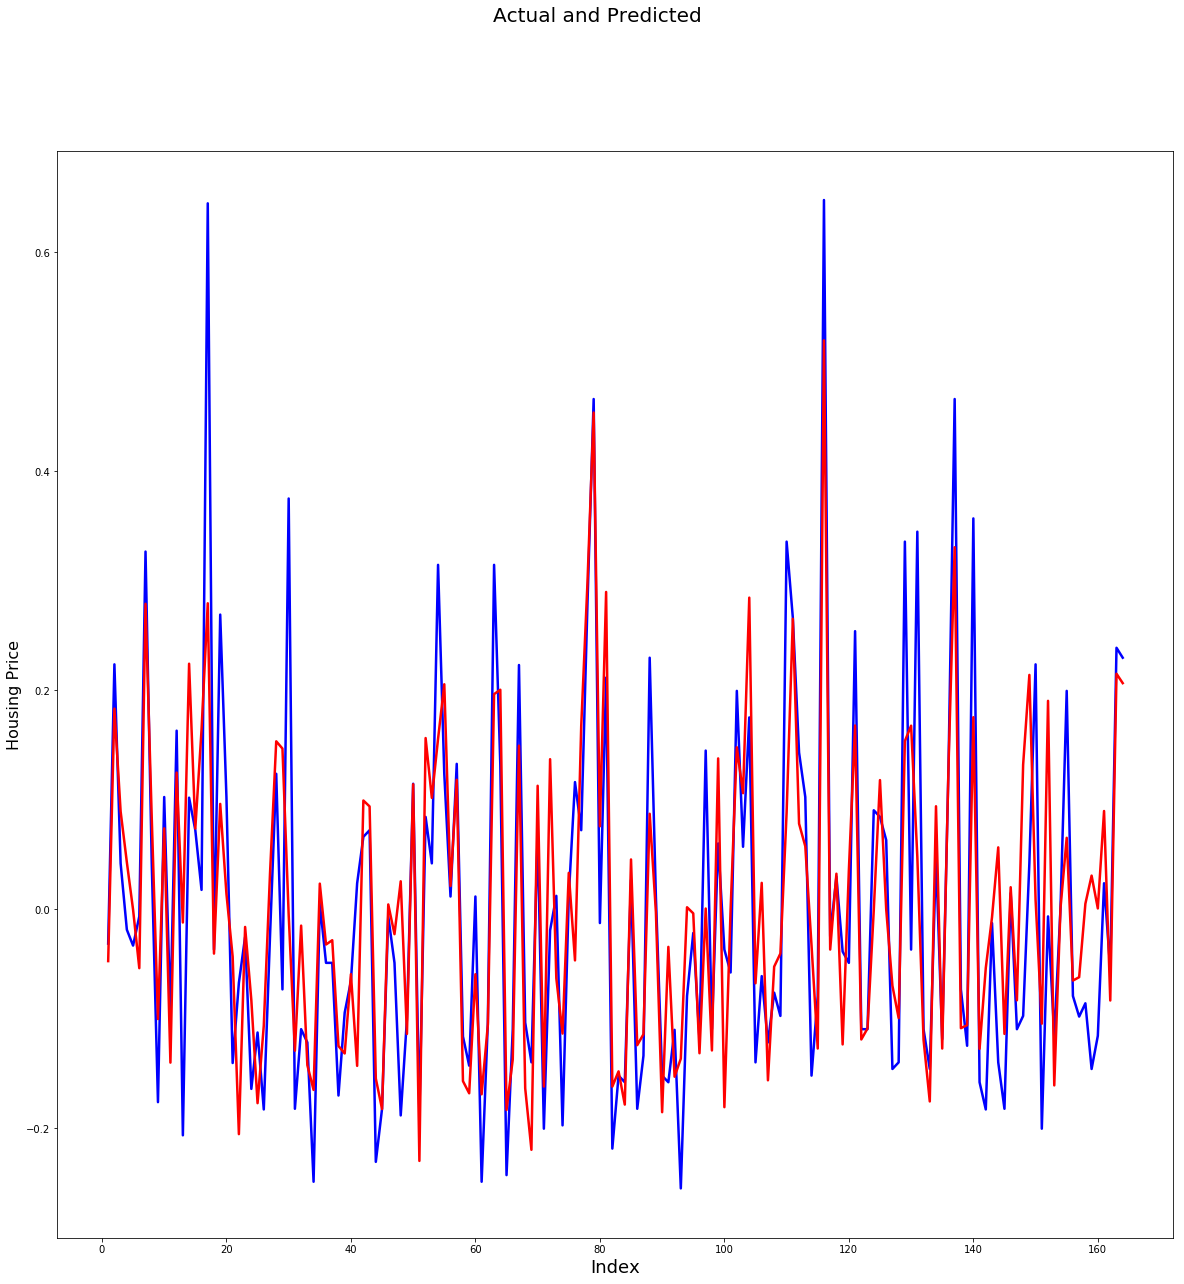

In [55]:
# Actual vs Predicted
c = [i for i in range(1,165,1)]
fig = plt.figure(figsize = (20,20))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m6, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

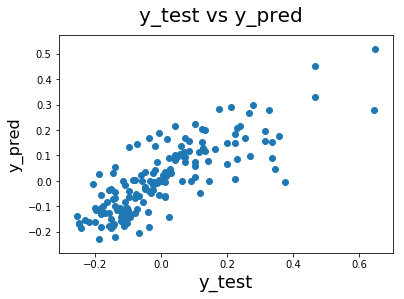

In [51]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

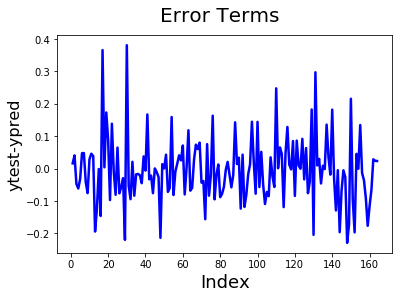

In [52]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred_m6, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

/home/abhi/venvs/notebook/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Index')

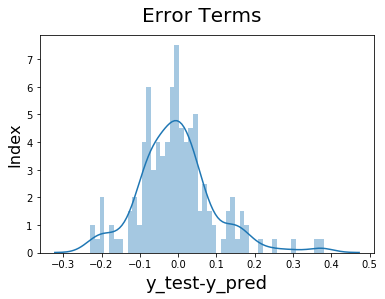

In [53]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m6),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [54]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m6)))

('RMSE :', 0.10001092336807829)
